In [2]:
import math
import pandas as pd
import numpy as np
import random
import time

from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

import scipy.signal as signal

%matplotlib inline
from Regression_compressive_sensing import *

#### Load/Read the images; plot (“imshow”) the images

(200, 192)


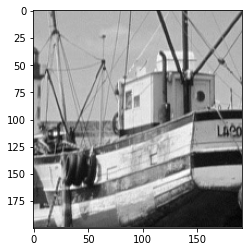

In [3]:
imgBoat = imgRead('fishing_boat.bmp')
print(imgBoat.shape)
imgShow(imgBoat)

(512, 640)


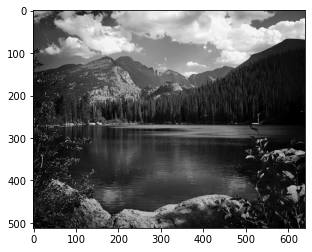

In [4]:
imgNature = imgRead('nature.bmp')
imgShow(imgNature)
print(imgNature.shape)

(800, 1280)


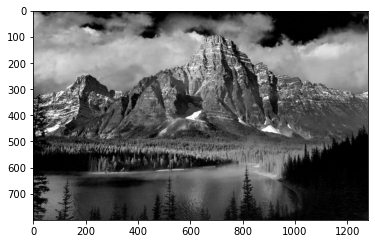

In [3]:
imgMountain = imgRead('mountain.jpg')[:,:,0]
imgShow(imgMountain)
print(imgMountain.shape)

#### Save the recovered images in current directory

In [5]:
def saveRecoveredPlots (imgIn, S_list, KernalSizeList, blockSize, pathName):
    start_time = time.time()
    for i in S_list:
        Recover_woMF = imgRecover(imgIn, blockSize, i)
        imgName1 = pathName + "woMF_%d.bmp"%(i)
        plt.imsave(imgName1, Recover_woMF, cmap='gray')

        for ks in KernalSizeList:
            Recover_w_MF_KS = signal.medfilt2d(Recover_woMF, kernel_size=ks)
            imgName2 = pathName + "w_MF_%d_KS_%d.bmp"%(i,ks)
            plt.imsave(imgName2, Recover_w_MF_KS, cmap='gray')
    
    print("finished in %s seconds" % (time.time() - start_time))

In [5]:
saveRecoveredPlots(imgBoat, [10,20,30,40,50], [3], 8,  "./BoatRecover/")

finished in 650.4221596717834 seconds


In [8]:
saveRecoveredPlots(imgNature, [10,40,100,150,200], [3,5,7], 16,  "./NatureRecover/")

finished in 4095.5144839286804 seconds


In [7]:
saveRecoveredPlots(imgNature, [10,20,30,40,50], [3], 8,  "./NatureRecover_8/")
saveRecoveredPlots(imgNature, [40,80,120,160], [3,5,7], 16,  "./NatureRecover/")
saveRecoveredPlots(imgNature, [160,320,480,640,800], [3,5,7], 32,  "./NatureRecover_32/")

finished in 6851.285752296448 seconds
finished in 3668.1228609085083 seconds
finished in 10137.408411741257 seconds


In [6]:
saveRecoveredPlots(imgMountain, [10,40,100,150,200], [3,5,7], 16,  "./MountainRecover/")

finished in 13903.900544643402 seconds
